
# Decision Trees and Random Forests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
file_path = '/content/drive/MyDrive/lecture_3_ML/car.data'
df = pd.read_csv(file_path, header = None)

In [5]:
df.shape

(1728, 7)

In [6]:
df.head()


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Rename column names
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-


In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

CAR car acceptability . . buying buying price . . maint price of the maintenance . . . doors number of doors . . . persons capacity in terms of persons to carry . . . lug_boot the size of luggage boot . . safety estimated safety of the car

# View summary of dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Frequency distribution of values in variables
Now, check the frequency counts of categorical variables.

In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

## Summary of variables
There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
class is the target variable.
## Explore class variable

In [11]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


The class target variable is ordinal in nature.

##Missing values in variables

In [12]:
# check missing values in variables

df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


## 10. Declare feature vector and target variable

In [13]:
X = df.drop(['class'], axis=1)

y = df['class']

## 11. Split data into separate training and test set

In [14]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

12. Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will check the data types of variables again.

In [16]:
# check data types in X_train

X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


## Encode categorical variables
Now, I will encode the categorical variables.

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [18]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.6 MB/s eta 0:00:00


In [19]:
# import category encoders

import category_encoders as ce

In [20]:
mappings = [
    {'col': 'buying', 'mapping': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}},
    {'col': 'maint', 'mapping': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}},
    {'col': 'doors', 'mapping': {'2': 0, '3': 1, '4': 2, '5more': 3}},
    {'col': 'persons', 'mapping': {'2': 0, '4': 1, 'more': 2}},
    {'col': 'lug_boot', 'mapping': {'small': 0, 'med': 1, 'big': 2}},
    {'col': 'safety', 'mapping': {'low': 0, 'med': 1, 'high': 2}},
]

In [21]:
# Create the encoder with specified mappings
encoder = ce.OrdinalEncoder(mapping=mappings)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data
X_test_encoded = encoder.transform(X_test)

In [22]:
print(X_train_encoded.head())
print(X_test_encoded.head())

      buying  maint  doors  persons  lug_boot  safety
48         3      3      1        2         1       0
468        2      3      1        1         0       0
155        3      2      1        2         0       2
1721       0      0      3        2         0       2
1208       1      0      0        2         0       2
      buying  maint  doors  persons  lug_boot  safety
599        2      2      2        0         1       2
1201       1      0      0        1         1       1
628        2      2      3        0         2       1
1498       0      2      3        1         1       1
1263       1      0      2        2         1       0


## 13. Decision Tree Classifier with criterion gini index

In [23]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [24]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Predict the Test set results with criterion gini index

In [25]:
y_pred_gini = clf_gini.predict(X_test_encoded)

In [26]:
print(y_pred_gini)

['unacc' 'acc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc'
 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc'
 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'unacc'
 'unacc' 'acc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'
 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc'
 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 

### Check accuracy score with criterion gini index

In [27]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy
Now, compare the train-set and test-set accuracy to check for overfitting.

In [28]:
y_pred_train_gini = clf_gini.predict(X_train_encoded)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


## Check for overfitting and underfitting

In [30]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train_encoded, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test_encoded, y_test)))

Training set score: 0.7865
Test set score: 0.8021


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

## 14. Decision Tree Classifier with criterion entropy

In [31]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

## 15. Confusion matrix

In [32]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


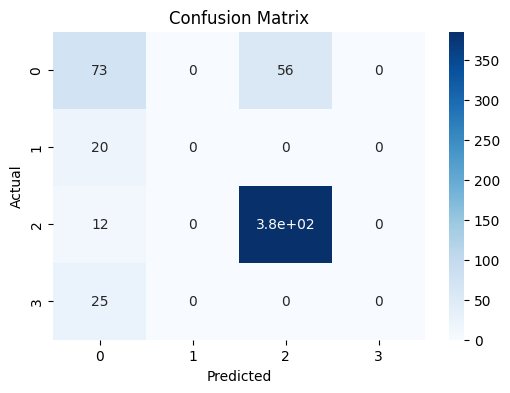

In [33]:
# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,cmap="Blues")
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###16. Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [34]:
from sklearn.metrics import classification_report
y_pred_en = clf_en.predict(X_test_encoded)
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Training a Random Forest Classifier

In [35]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=42)
# Train model
rf = randomforest.fit(X_train_encoded, y_train)
y_pred_rf = rf.predict(X_test_encoded)
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(X_train_encoded, y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test_encoded, y_test)))

Training set score: 1.0000
Test set score: 0.9685


In [36]:
# Get the parameters of the current model
params = rf.get_params()
# Print the parameters
for param, value in params.items():
    print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [37]:
# Define the hyperparameters manually
max_depth = 10      # Maximum depth of each tree
min_samples_split = 5  # Minimum samples to split
min_samples_leaf = 5  # Minimum samples at a leaf node
# Create the Random Forest model with specified hyperparameters
rf = RandomForestClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42  # Set a random state for reproducibility
)

# Fit the model on the training data
rf.fit(X_train_encoded, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [38]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(X_train_encoded, y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test_encoded, y_test)))

Training set score: 0.9836
Test set score: 0.9510


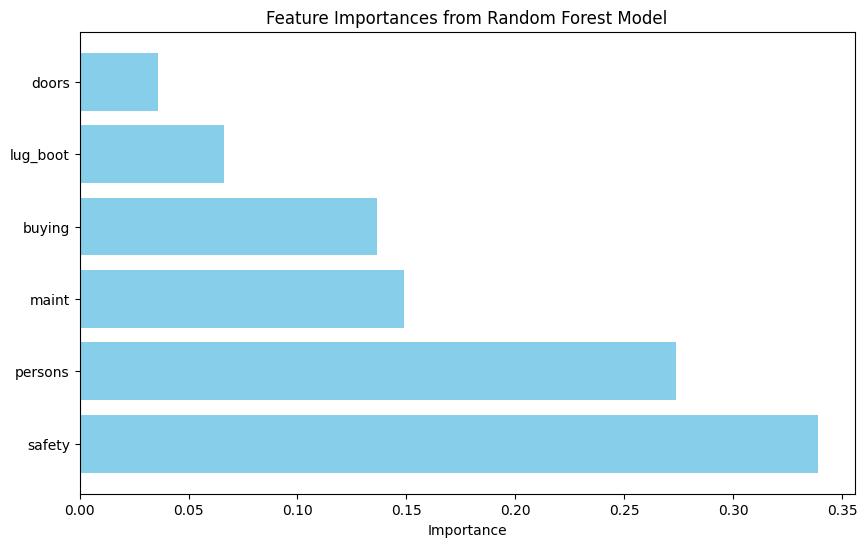

In [39]:
# Calculate feature importances
importances = rf.feature_importances_
# Create a DataFrame for feature importances
feature_names = X_train_encoded.columns  # Assuming you are using a DataFrame for features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
#plt.gca().invert_yaxis()  # Invert y axis to have the most important feature on top
plt.show()

# Model Training and Selection Part 1

## Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [41]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.98 0.96 0.98]


In [42]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


## Stratified K-Fold

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [44]:
import pandas as pd
# Create a DataFrame for the target variable
pd.Series(iris.target).value_counts()

,count
0,50
1,50
2,50


In [45]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)
kfold

KFold(n_splits=3, random_state=None, shuffle=False)

We saw earlier that we can adjust the number of folds that are used in cross_val_score using the cv parameter. However, scikit-learn allows for much finer control over what happens during the splitting of the data by providing a cross- validation splitter as the cv parameter.

In [46]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


This way, we can verify that it is indeed a really bad idea to use three-fold (nonstrati‐ fied) cross-validation on the iris dataset:


In [47]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


Remember: each fold corresponds to one of the classes in the iris dataset, and so nothing can be learned. Another way to resolve this problem is to shuffle the data instead of stratifying the folds, to remove the ordering of the samples by label. We can do that by setting the shuffle parameter of KFold to True.

In [48]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


In [49]:
from sklearn.model_selection import StratifiedKFold
# Set up stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [50]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=skf)))

Cross-validation scores:
[1.   0.94 0.96]


## Grid Search with Cross Validation

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris = load_iris()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42, stratify=iris.target)
pd.Series(y_train).value_counts()

,count
1,35
0,35
2,35


In [52]:
pd.Series(y_test).value_counts()

,count
2,15
1,15
0,15


In [53]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Norm used for penalization (only 'l2' works for LogisticRegression with saga solver)
    'solver': ['liblinear', 'saga']  # Solvers that support both L1 and L2 penalties
}
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [54]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.98


In [55]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.98


In [56]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='saga')


In [57]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_) # show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002384,0.001424,0.001027,0.000102,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,19
1,0.001775,0.000132,0.000990,0.000035,0.01,l1,saga,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,19
2,0.001622,0.000103,0.000964,0.000053,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,18
3,0.010409,0.001100,0.001013,0.000054,0.01,l2,saga,"{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}",0.857143,0.904762,0.857143,0.857143,0.904762,0.876190,0.023328,15
4,0.002524,0.000580,0.000962,0.000049,0.10,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.714286,0.714286,0.666667,0.666667,0.714286,0.695238,0.023328,17
